# 第2章 数学とRの導入

この章では、本講義で使用するR言語の基本操作を学びます。  
まずbase R（Rの標準機能）でデータ操作と可視化の基本を押さえ、次にtidyverse（`ggplot2`を含む拡張パッケージ群）を導入します。

**動作環境**: Google Colab
*このノートブックは Claude Opus 4.6 を利用して作成しました。*

## 2.1 Rの基本操作

Rはそのまま電卓として使うことができます。四則演算、べき乗、平方根などを試してみましょう。

In [1]:
5 + 3

[1] 8

In [2]:
5 - 3

[1] 2

In [3]:
5 * 3

[1] 15

In [4]:
5 / 3

[1] 1.666667

In [5]:
# べき乗
5 ^ 3

[1] 125

In [6]:
# 平方根
sqrt(4)

[1] 2

In [7]:
# 自然対数（本講義で頻出）
log(100)

[1] 4.60517

In [8]:
# 指数関数（ネイピア数 e）
exp(1)

[1] 2.718282

In [9]:
# 括弧を使った計算
5 * (10 - 3)

[1] 35

## 2.2 変数への代入

計算結果を変数に保存するには `<-` を使います。

In [10]:
a <- 10

In [11]:
a

[1] 10

In [12]:
a / 2

[1] 5

In [13]:
a ^ 2

[1] 100

In [14]:
b <- 3

In [15]:
a + b

[1] 13

In [16]:
a * b

[1] 30

## 2.3 ベクトルの作成と操作

Rの基本的なデータ構造は**ベクトル**です。  
`c()` 関数（combine）で複数の値をまとめてベクトルを作ります。

In [17]:
x <- c(200, 350, 420, 510, 600, 680, 750, 900, 1200, 2500)

In [18]:
x

 [1]  200  350  420  510  600  680  750  900 1200 2500

In [19]:
# 要素数
length(x)

[1] 10

In [20]:
# 1番目の要素
x[1]

[1] 200

In [21]:
# 3番目から5番目
x[3:5]

[1] 420 510 600

In [22]:
# 昇順に並べ替え
sort(x)

 [1]  200  350  420  510  600  680  750  900 1200 2500

ベクトルに対する演算は、各要素に対して適用されます。

In [23]:
# 各要素を10で割る
x / 10

 [1]  20  35  42  51  60  68  75  90 120 250

In [24]:
# 各要素から平均を引く（偏差）
x - mean(x)

 [1] -611 -461 -391 -301 -211 -131  -61   89  389 1689

In [25]:
# 各要素の対数をとる
log(x)

 [1] 5.298317 5.857933 6.040255 6.234411 6.396930 6.522093 6.620073
 [8] 6.802395 7.090077 7.824046

## 2.4 基本統計量

ベクトルに対して、平均・分散・標準偏差などの基本統計量を計算してみましょう。  
上で作ったベクトル `x`（架空の世帯年収データ、単位: 万円）を使います。

In [26]:
# 平均
mean(x)

[1] 811

In [27]:
# 中央値
median(x)

[1] 640

In [28]:
# 分散（Rの var() は不偏推定量: n-1 で割る）
var(x)

[1] 434076.7

In [29]:
# 標準偏差
sd(x)

[1] 658.8449

In [30]:
# 要約統計量の一覧
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  200.0   442.5   640.0   811.0   862.5  2500.0 

## 2.5 データの可視化（base R）

Rの標準関数でグラフを描いてみましょう。

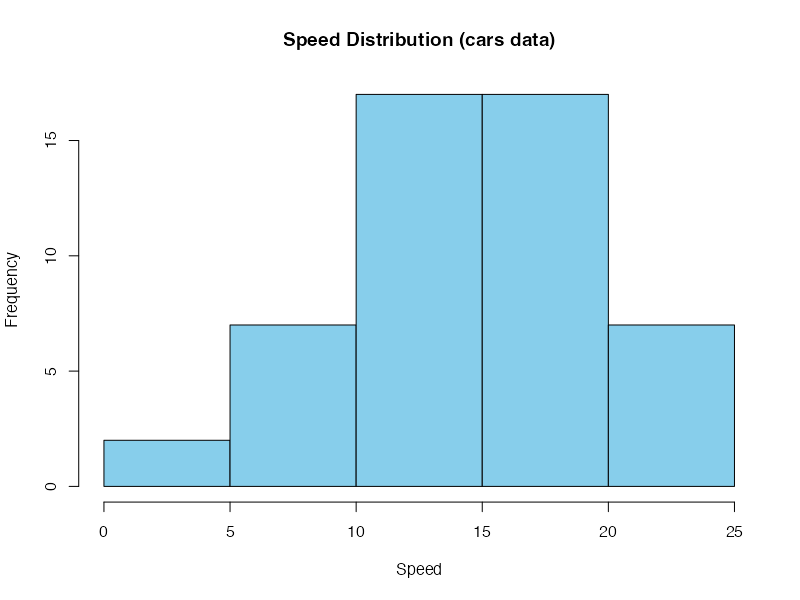

In [31]:
# ヒストグラム（組み込みデータ cars を使用）
hist(cars$speed,
     main = "Speed Distribution (cars data)",
     xlab = "Speed",
     col  = "skyblue")

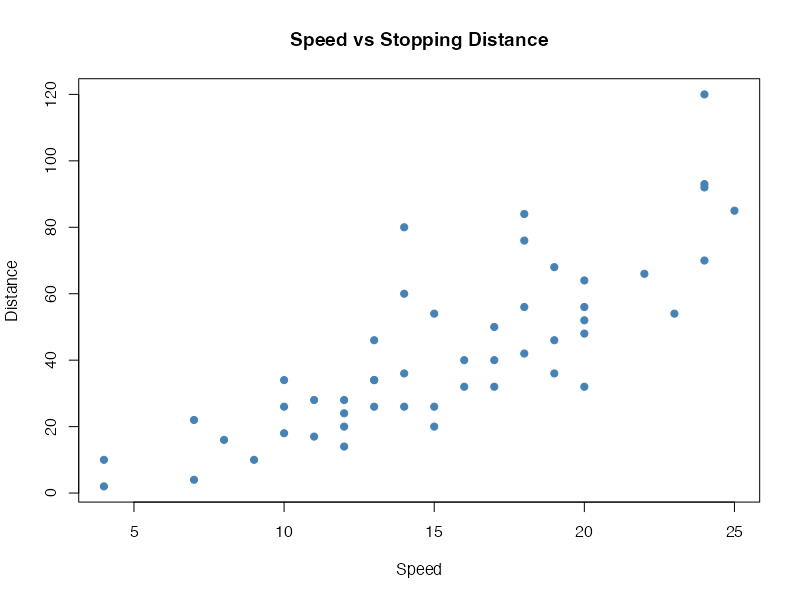

In [32]:
# 散布図
plot(cars$speed, cars$dist,
     main = "Speed vs Stopping Distance",
     xlab = "Speed",
     ylab = "Distance",
     pch  = 19,
     col  = "steelblue")

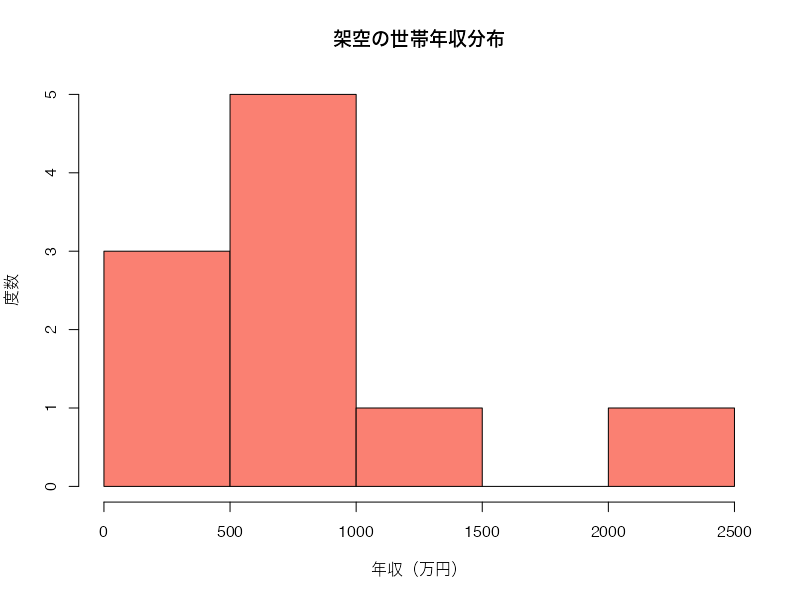

In [33]:
# 先ほどの「年収」データのヒストグラム
hist(x,
     breaks = 6,
     main   = "架空の世帯年収分布",
     xlab   = "年収（万円）",
     ylab   = "度数",
     col    = "salmon")

## 2.6 tidyverse の導入

`tidyverse` は、データの加工・可視化を効率的に行うためのパッケージ群です。  
特に `ggplot2`（グラフ作成）と `dplyr`（データ操作）を多用します。

**パイプ演算子 `%>%`**: 左の結果を右の関数の第1引数に渡します。  
「データを取って → 加工して → 可視化する」という流れを自然に書けます。

In [34]:
library(tidyverse)

── Attaching core tidyverse packages ─────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ───────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


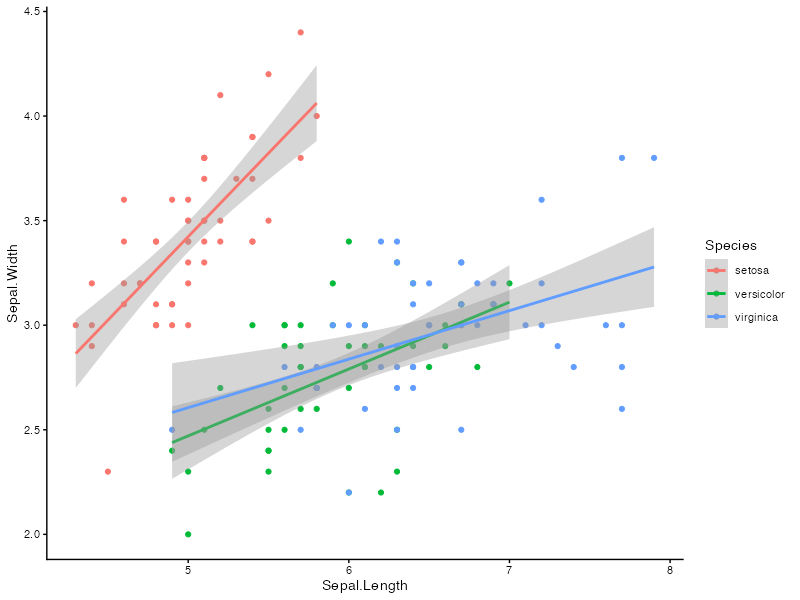

`geom_smooth()` using formula = 'y ~ x'

In [35]:
# iris データで ggplot の基本を練習
# データ → 列を選択 → 散布図を描画
iris %>%
  select(Sepal.Length, Sepal.Width, Species) %>%
  ggplot(aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_point() +
  geom_smooth(method = "lm") +
  theme_classic()

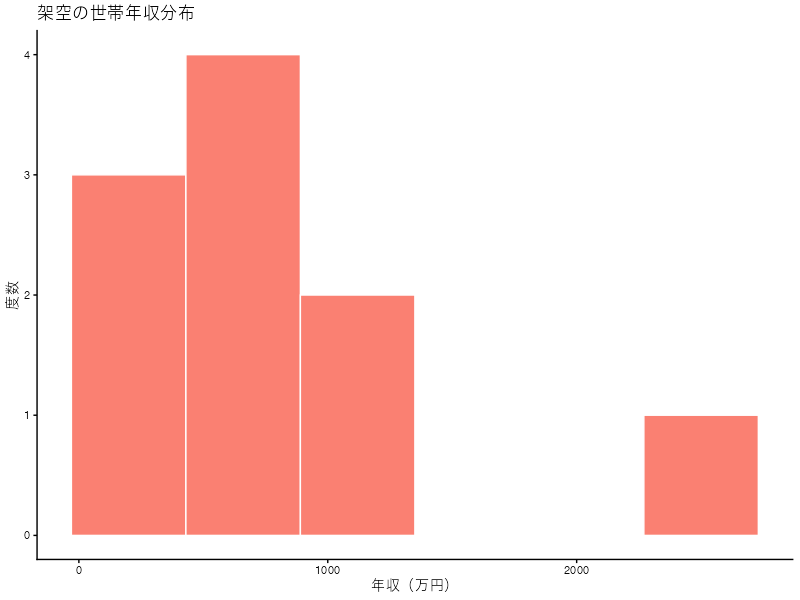

In [36]:
# 「年収」データを ggplot で描画
data.frame(income = x) %>%
  ggplot(aes(x = income)) +
  geom_histogram(bins = 6, fill = "salmon", color = "white") +
  labs(title = "架空の世帯年収分布",
       x = "年収（万円）",
       y = "度数") +
  theme_classic()

## まとめ

この章で学んだこと:

- Rの基本操作（演算、変数代入、ベクトル）
- 基本統計量の計算（`mean()`, `var()`, `sd()`）
- データの可視化（base R の `hist()`, `plot()` と ggplot2）